## EasyVisa Project


## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [72]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [73]:
# read the data
data = pd.read_csv('EasyVisa.csv')

In [74]:
# copy data to another variable to avoid any changes to original data
df = data.copy()

## Overview of the Dataset

In [75]:
# return the first five rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [76]:
# return the last five rows
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [77]:
# return the number of rows by the number of columns
df.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns of data

In [78]:
# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#Observations:


* case_status is the dependent variable- type object.
* Independent variables are in both type of the data, integer (3) and object (8).

In [79]:
# check missing values across each columns
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There is no missing value in the data set.

In [80]:
# check for duplicates
duplicates = df.duplicated()
# print the duplicated rows
print(df[duplicates])

Empty DataFrame
Columns: [case_id, continent, education_of_employee, has_job_experience, requires_job_training, no_of_employees, yr_of_estab, region_of_employment, prevailing_wage, unit_of_wage, full_time_position, case_status]
Index: []


* There is no dublicates.

In [81]:
# checking for unique values in ID column
df["case_id"].nunique()

25480

* Since all the values in **case_id** column are unique we can drop it

In [82]:
# drop "case_id" column
columns_to_drop = ["case_id"]
df = df.drop(columns_to_drop, axis=1)

In [83]:
df.head()


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [84]:
# check statistical summary of the all data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observations:
* Majority of the employees applied from **Asia**
* The most common education of employees is **Bachelors**
* Most of the employees do not require training.
* Unit wage is yearly for most of the employees.
* Most of the employees aplied for full-time position.

In [85]:
# check statistical summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* Average prevailing wage is about 75,000 dollars.
* 75% of the companys have number of employees that is less than 3504.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

#### Fixing the negative values in number of employees columns

In [86]:
negative_values = df[df['no_of_employees'] < 0]
num_negative_values = negative_values.shape[0]


In [87]:
shape_of_negative_values = negative_values.shape


In [88]:
# write the function to convert the values to a positive number
df["no_of_employees"] = df["no_of_employees"].abs()


In [89]:
#lets check again.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Let's check the count of each unique category in each of the categorical variables

In [90]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
--------------------------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
--------------------------------------------------
full_time_posit

### Univariate Analysis

In [91]:
# Lets write function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [92]:
# Lets write a function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on number of employees

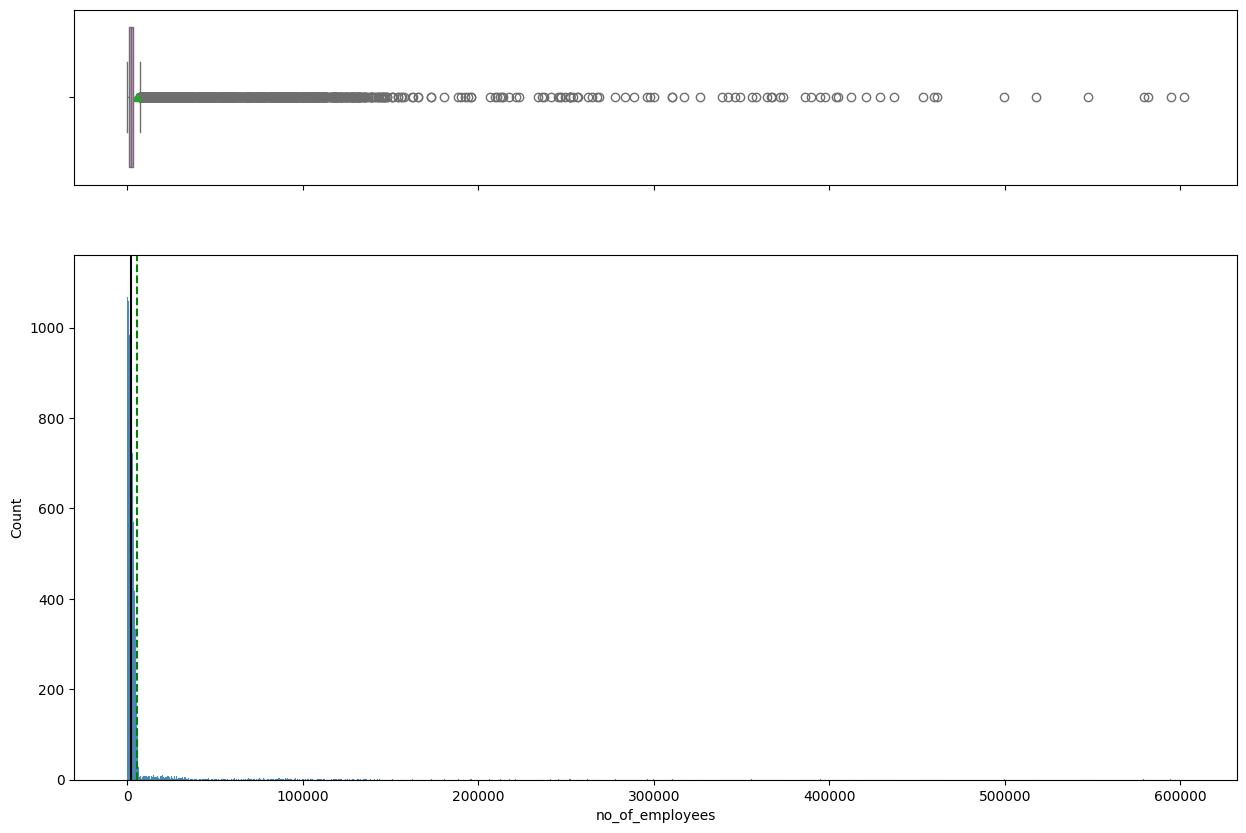

In [93]:
histogram_boxplot(df, "no_of_employees")

#### Observations on prevailing wage

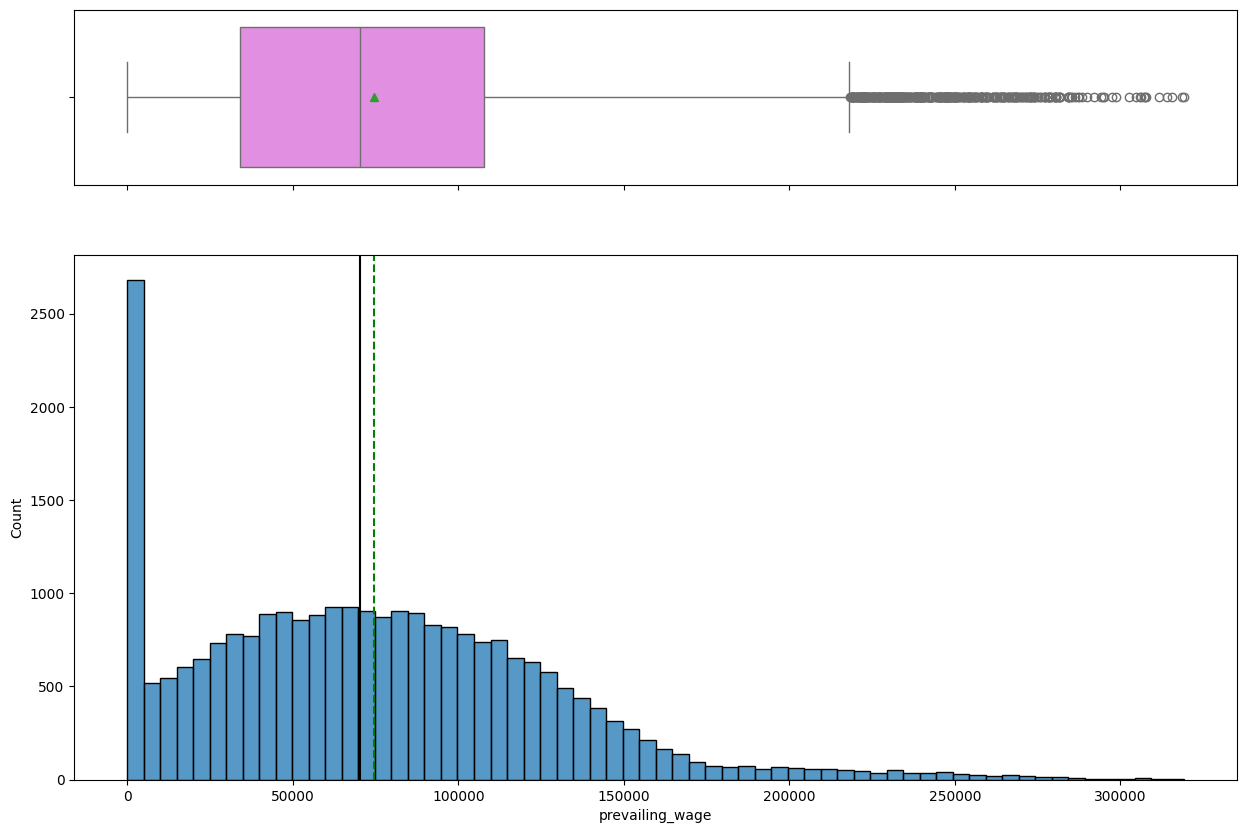

In [94]:
histogram_boxplot(df, "prevailing_wage")

Observations:
* The distribution is right skewed.
* Prevailing wage is very small for more than 2500 employees. There might be a mistake here.
* Mean and median are close.

In [95]:
# check the observations which have less than 100 prevailing wage
df.loc[df["prevailing_wage"] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [96]:
# count of the values in the mentioned column
count_values = df.loc[df["prevailing_wage"] < 100, "unit_of_wage"].value_counts()
print(count_values)


unit_of_wage
Hour    176
Name: count, dtype: int64


* 176 prevailing wage values rae less than 100. And all are hourly rates which make sense.

#### Observations on continent

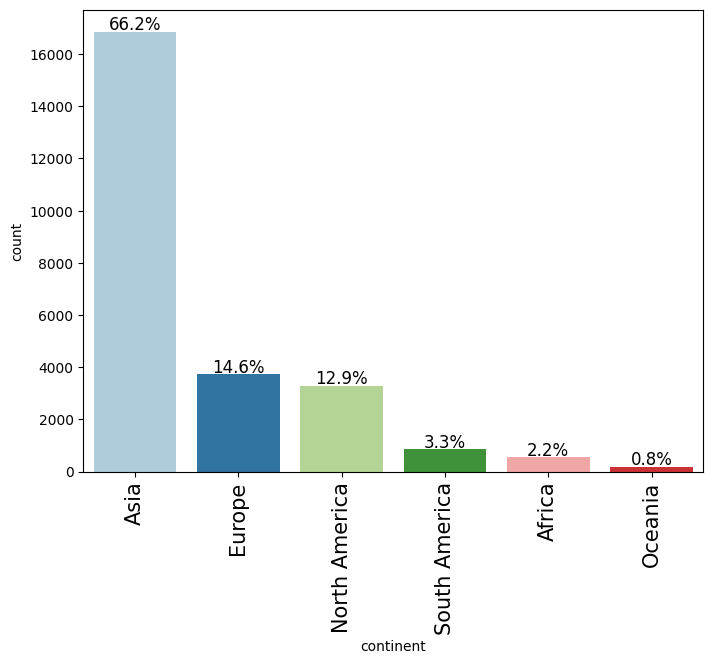

In [97]:
labeled_barplot(df, "continent", perc=True)

* 66% of the employees are applying from Asia.

#### Observations on education of employee

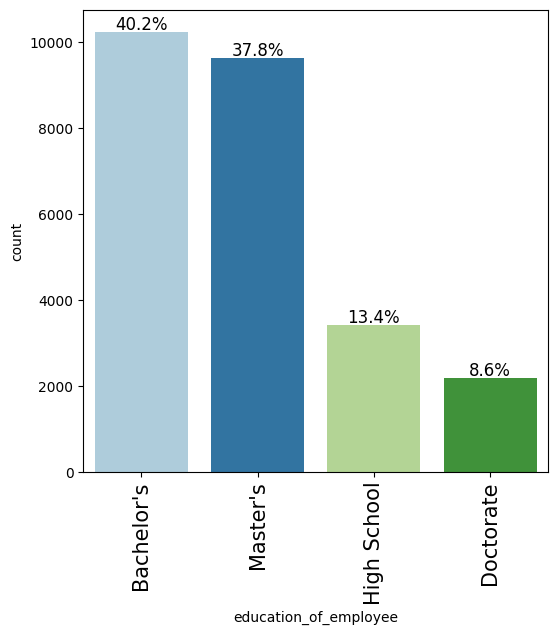

In [98]:
labeled_barplot(df, 'education_of_employee', perc=True)

* Most of the employees have Bachelor's or Masters degree.
* Only 8.6 % of them have Doctorate degree.

#### Observations on job experience

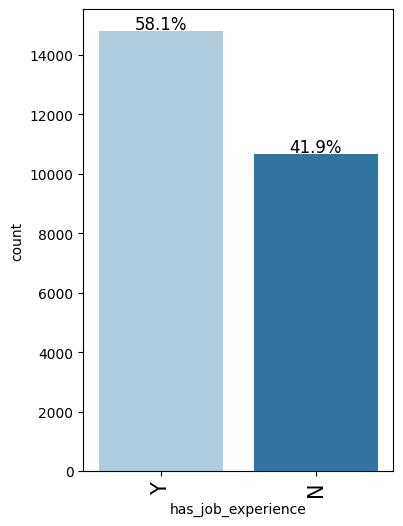

In [99]:
labeled_barplot(df, 'has_job_experience', perc=True)

* More than half ( 58.1 %)of the employees have job experience.

#### Observations on job training

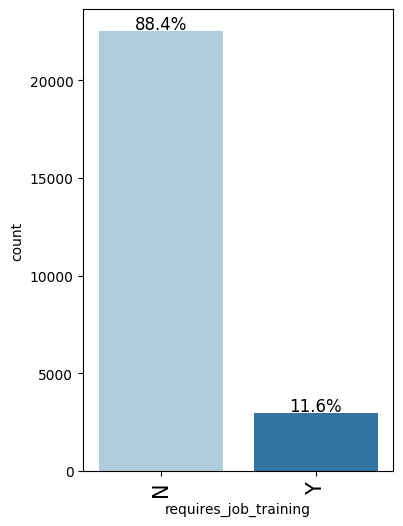

In [100]:
labeled_barplot(df, 'requires_job_training', perc=True)

* 88.4 % of the employees do not require job training.

#### Observations on region of employment

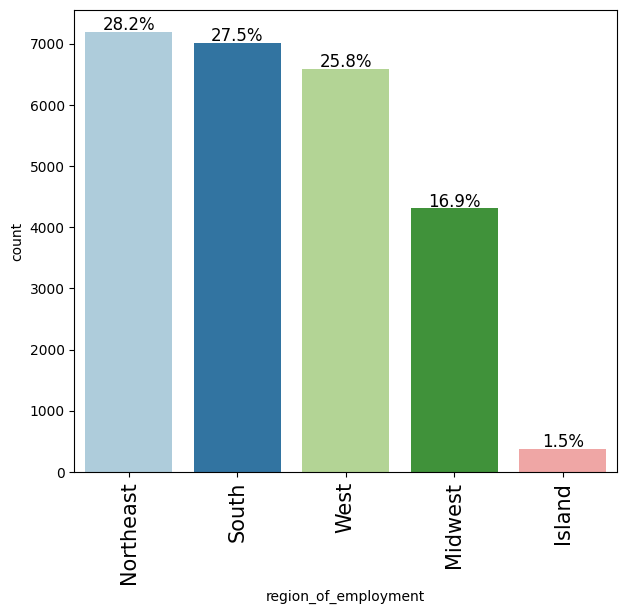

In [101]:
labeled_barplot(df, 'region_of_employment', perc=True)

* Although Northeast has the highest interest of the employees, South and West has very close values.

#### Observations on unit of wage

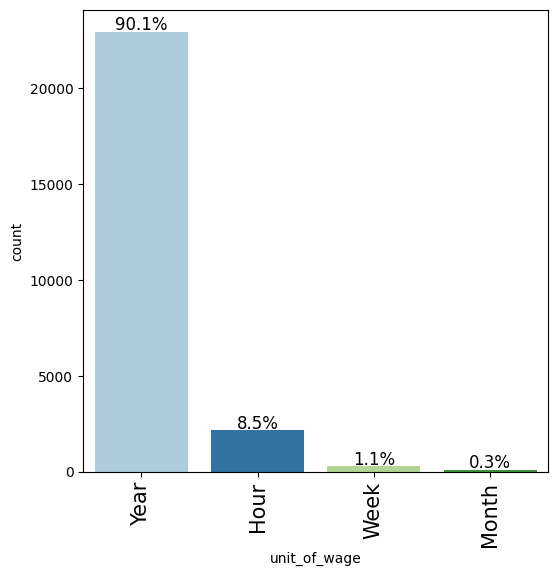

In [102]:
labeled_barplot(df, 'unit_of_wage', perc=True)

* 90 % of the unit wage is yearly.

#### Observations on case status

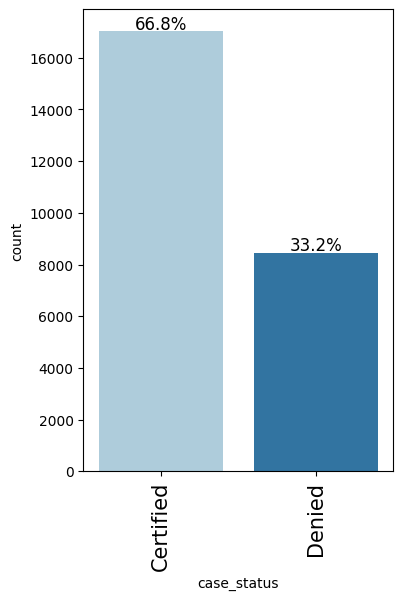

In [103]:
labeled_barplot(df, 'case_status', perc=True)

* About 2/3 of the visa applications are certified.

### Bivariate Analysis

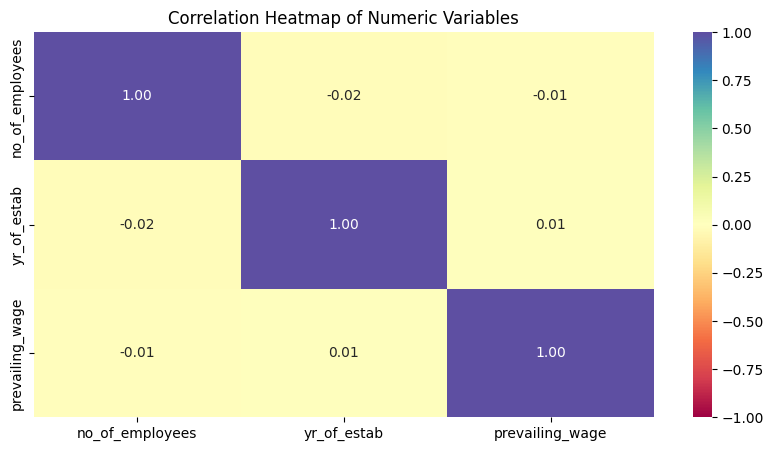

In [104]:
# find the correlation between the variables
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


* There is weak positive correlation between  prevailing wage and year of estab.
* There is weak negative correlation between number of employees and year of estab.
* There is weak negative correlation between number of employees and year of estab.

**Creating functions that will help us with further analysis.**

In [105]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [106]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


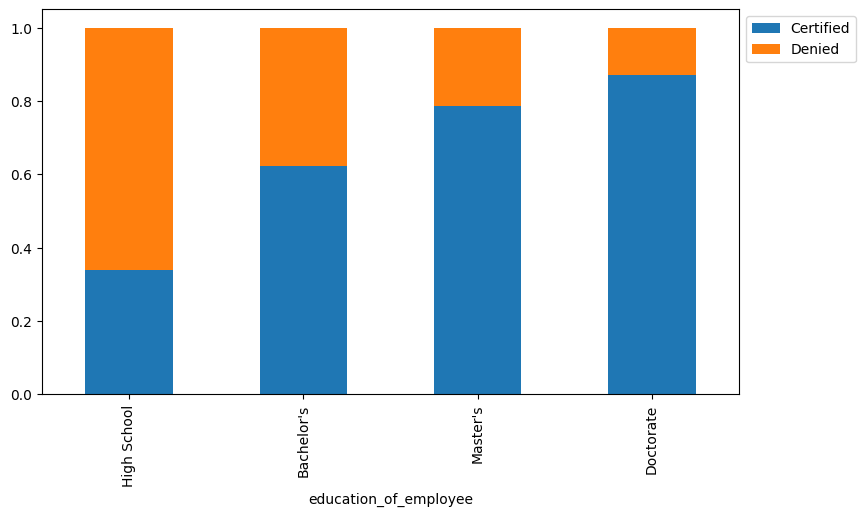

In [107]:
stacked_barplot(df, "education_of_employee", "case_status")

* Employees that has doctorate have highest rate of the Visa certification.
* As level of degree increase, rate of the getting visa certified increase.

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

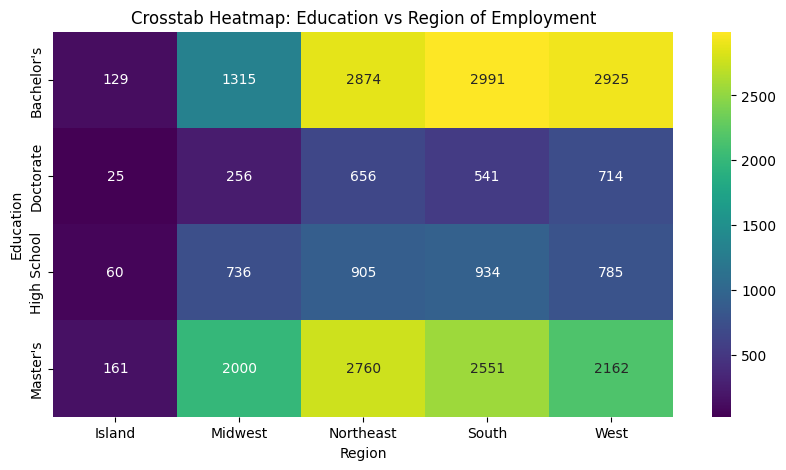

In [108]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df['education_of_employee'], df['region_of_employment']),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.title("Crosstab Heatmap: Education vs Region of Employment")
plt.show()


#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


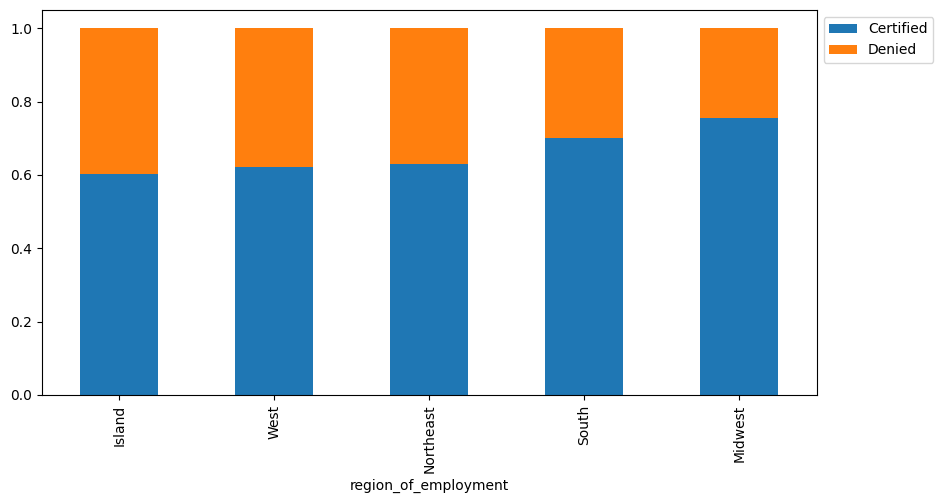

In [109]:
stacked_barplot(df, "region_of_employment", "case_status")

* Even though slightly higher, West region has the highest rate of that visa certified.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


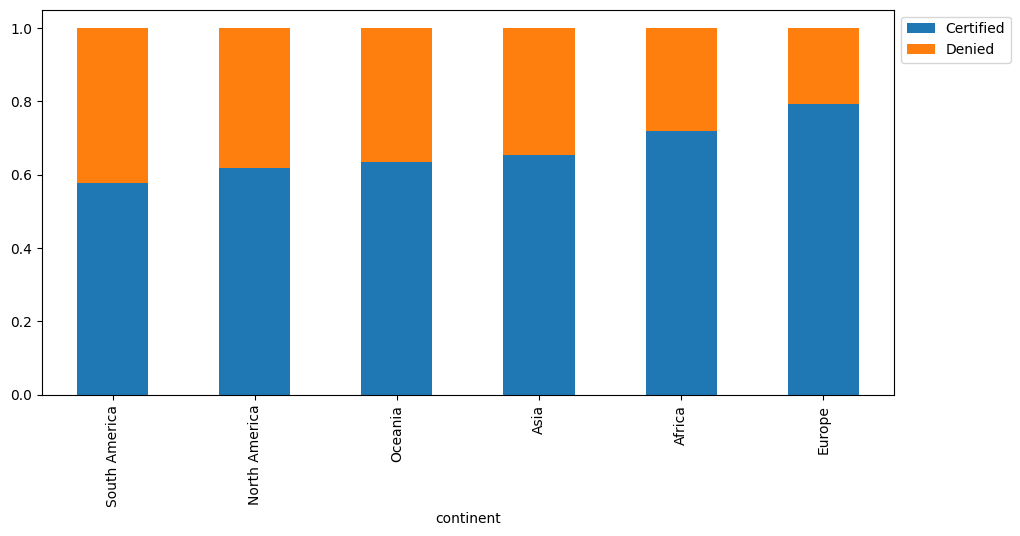

In [110]:
stacked_barplot(df, "continent", "case_status")

* Europe has the highest rate of that visa certified.

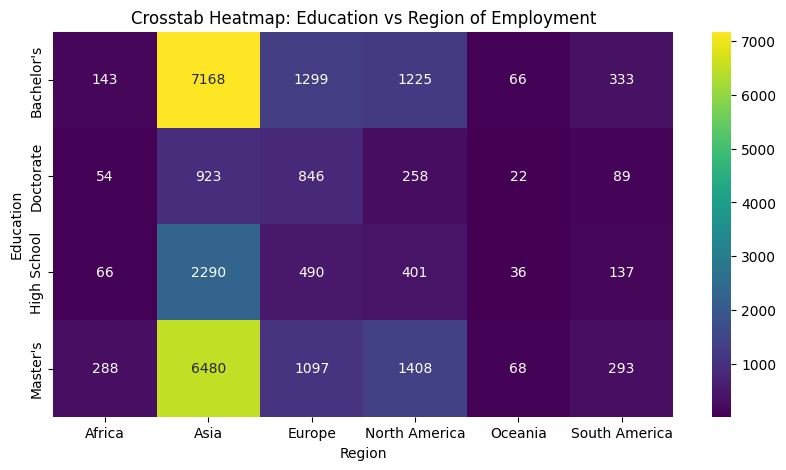

In [111]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df['education_of_employee'], df['continent']),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.title("Crosstab Heatmap: Education vs Region of Employment")
plt.show()


#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


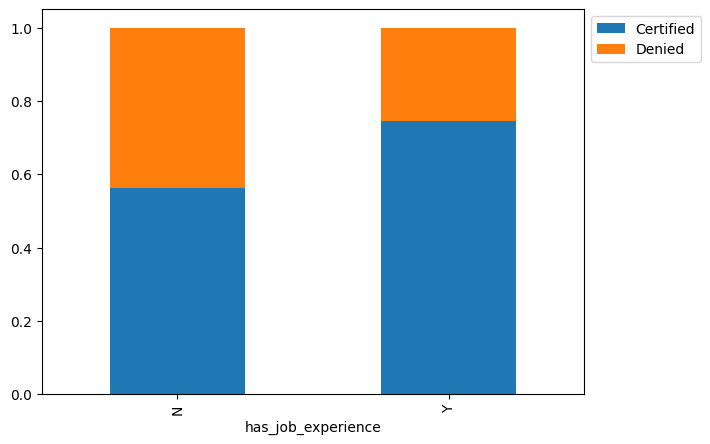

In [112]:
stacked_barplot(df, "has_job_experience", "case_status")

* Employees that have work experience more likely have visa.

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


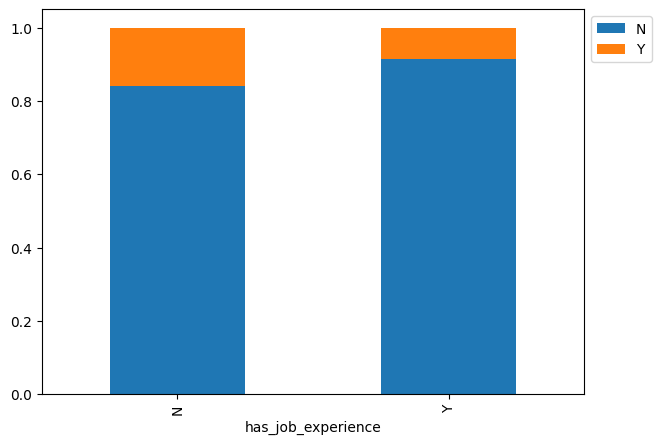

In [113]:
stacked_barplot(df, "has_job_experience", "requires_job_training")

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

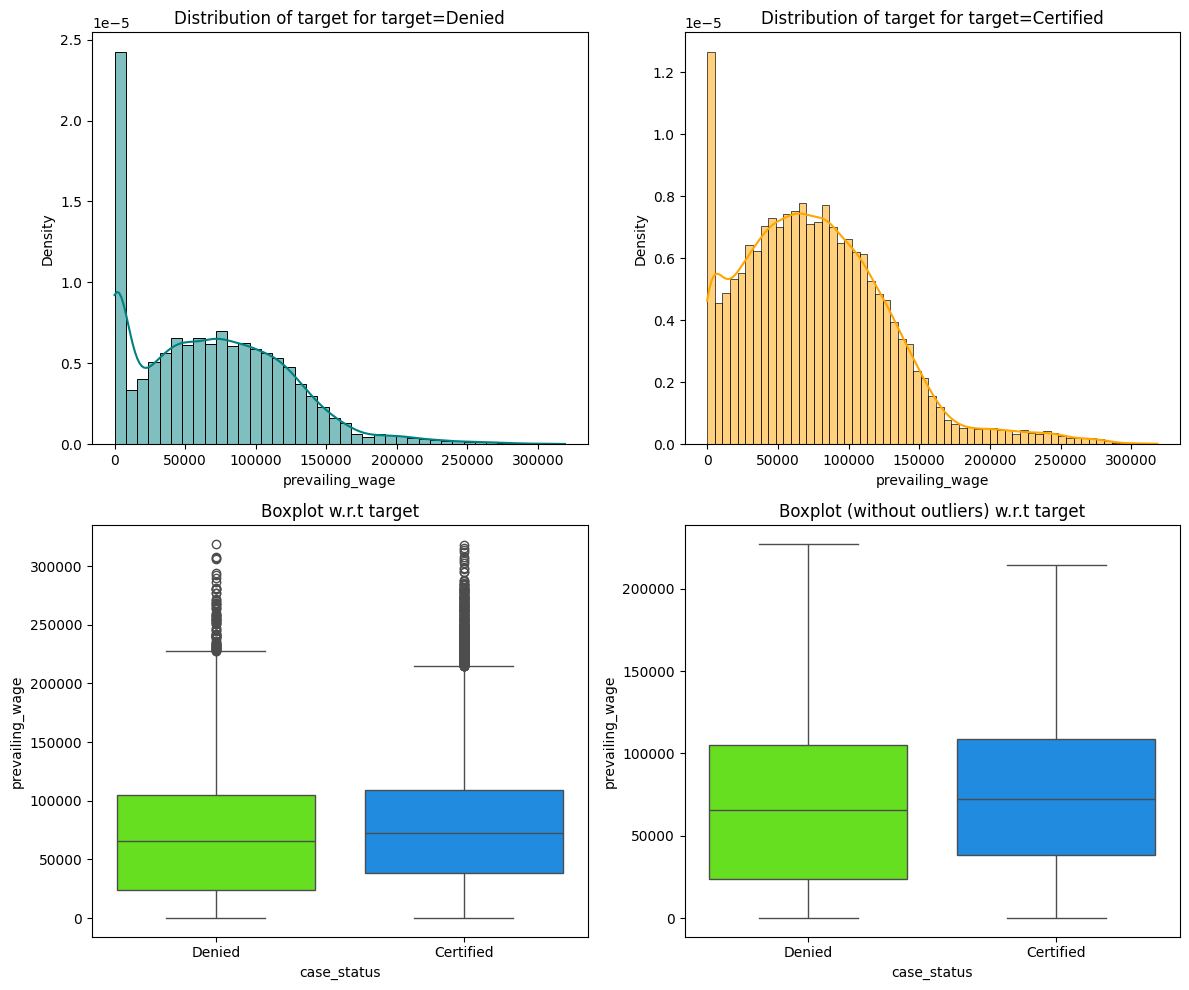

In [114]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

#### Checking if the prevailing wage is similar across all the regions of the US

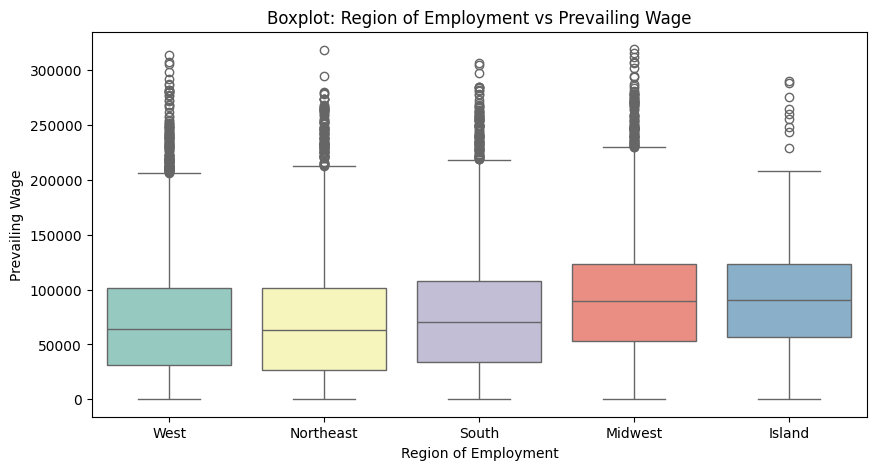

In [115]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='region_of_employment', y='prevailing_wage', palette='Set3')

plt.title('Boxplot: Region of Employment vs Prevailing Wage')
plt.xlabel('Region of Employment')
plt.ylabel('Prevailing Wage')
plt.show()


* Although Midwest and Island are slighlty higher, other three regions have very close median of prevailing_wage.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


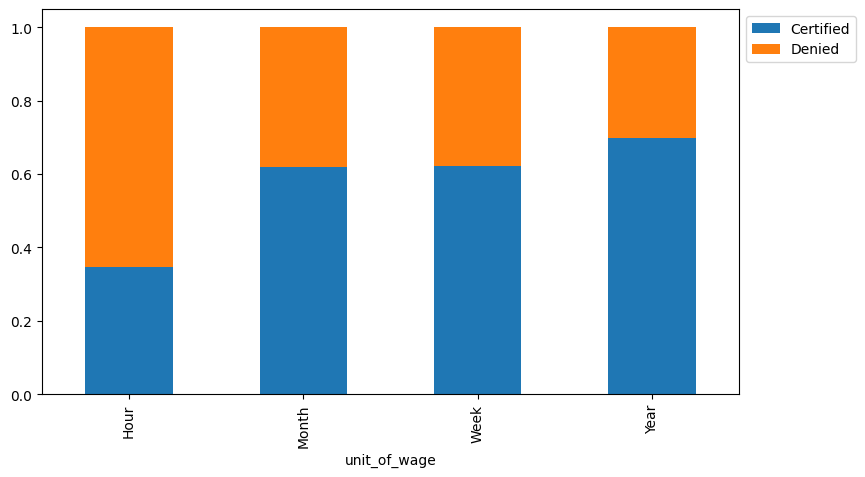

In [116]:
stacked_barplot(df, "unit_of_wage", "case_status") ## Complete the code to plot stacked barplot for unit of wage and case status

* Employees applied jobs that have yaerly wage has higher rate of the getting the visa.

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

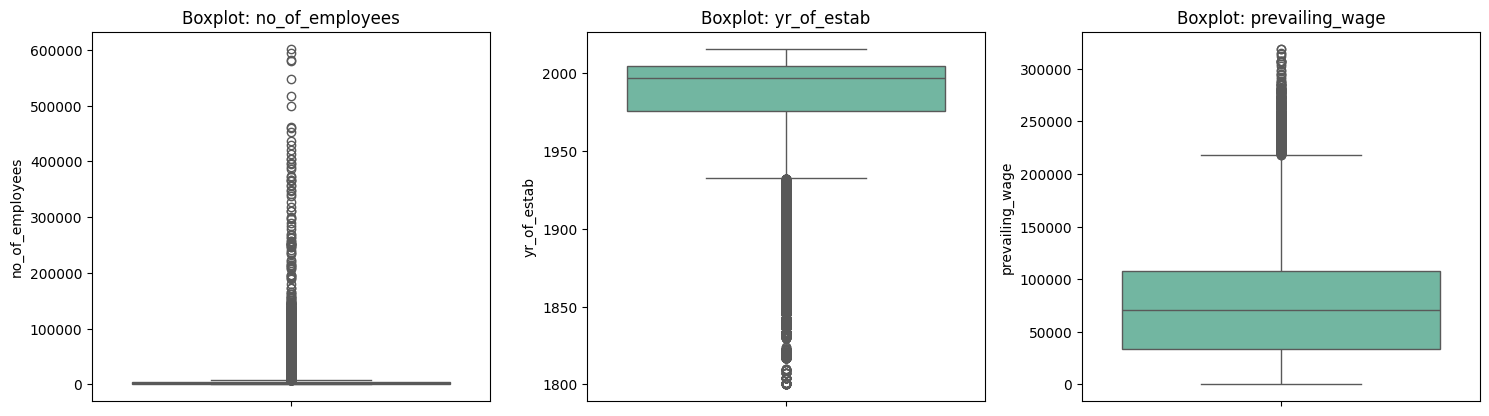

In [117]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, y=variable, palette='Set2')
    plt.title(f'Boxplot: {variable}')

plt.tight_layout()
plt.show()


* All numerical variables have outliers. But we will not treat them.

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [118]:
from sklearn.model_selection import train_test_split

# Convert "case_status" to binary (1 for "Certified", 0 for others)
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# Drop the "case_status" column from the features
X = df.drop("case_status", axis=1)

# Create dummy variables for categorical columns in X
X = pd.get_dummies(X)

# Split the data into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, data["case_status"], test_size=0.3, random_state=1, stratify=data["case_status"])


In [119]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 28)
Shape of test set :  (7644, 28)
Percentage of classes in training set:
case_status
Certified    0.667919
Denied       0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
Certified    0.667844
Denied       0.332156
Name: proportion, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [120]:
# define a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [121]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [122]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree classifier
model = DecisionTreeClassifier(random_state=1)

# Fit the Decision Tree classifier on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

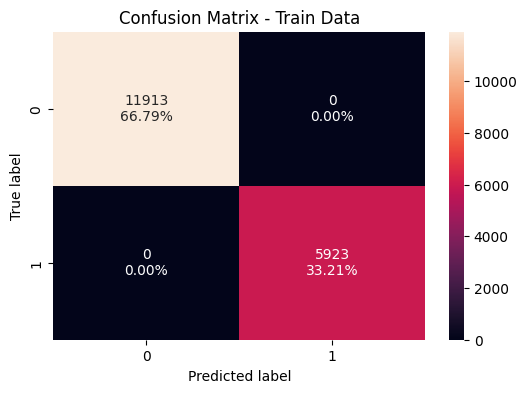

In [123]:
confusion_matrix_sklearn(model, X_train, y_train)
plt.title('Confusion Matrix - Train Data')
plt.show()


* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

In [124]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    if isinstance(target.iloc[0], str):  # Check if true labels are strings
        pred_labels = np.where(pred == 'Certified', 'Certified', 'Denied')
    else:
        pred_labels = np.where(pred == 1, 'Certified', 'Denied')

    acc = accuracy_score(target, pred_labels)  # to compute Accuracy
    recall = recall_score(target, pred_labels, pos_label='Certified')  # to compute Recall
    precision = precision_score(target, pred_labels, pos_label='Certified')  # to compute Precision
    f1 = f1_score(target, pred_labels, pos_label='Certified')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [125]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
print(decision_tree_perf_train)


   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Checking model performance on test set

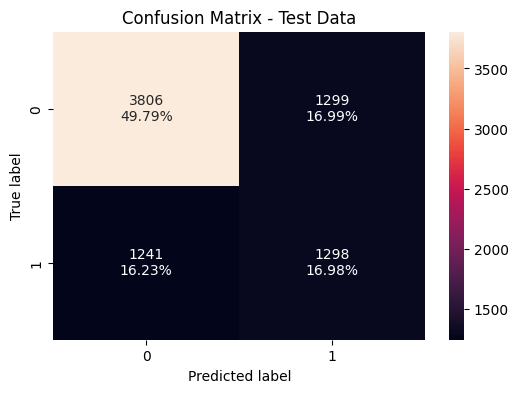

In [126]:
confusion_matrix_sklearn(model, X_test, y_test)
plt.title('Confusion Matrix - Test Data')
plt.show()

In [127]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.667713,0.745544,0.754111,0.749803


* F1 value in test data is not so high.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Decision Tree

In [186]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.f1_score)
# Assuming 'Certified' is the positive class. Change this if necessary.
scorer = metrics.make_scorer(f1_score, pos_label='Certified')

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

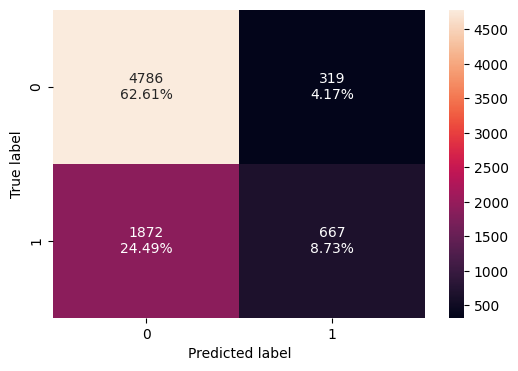

In [187]:
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.709632  0.929069   0.718608  0.810397
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.71337  0.937512   0.718834  0.813738


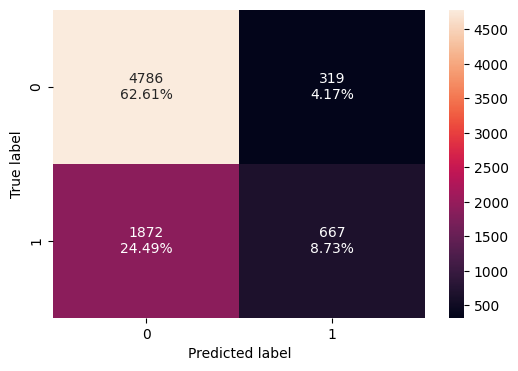

In [188]:
#Calculate different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Create confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)



* The overfitting has reduced and the test f1-score has increased.
* Let's try some other models.

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [189]:
base_estimator = DecisionTreeClassifier(random_state=1)

# Define the Bagging classifier
bagging_classifier = BaggingClassifier(base_estimator, random_state=1)

# Fit the Bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1),
                  random_state=1)

#### Checking model performance on training set

In [190]:
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.978695  0.996474   0.972316  0.984247


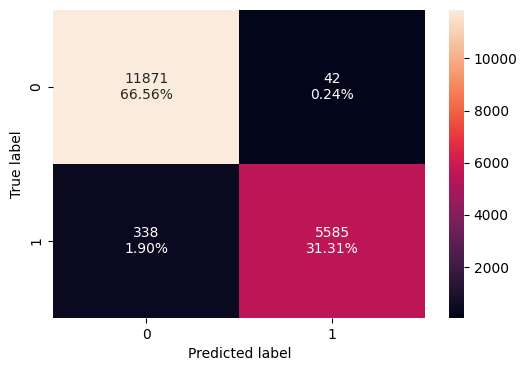

In [191]:
confusion_matrix_sklearn(bagging_classifier,X_train,y_train)

#### Checking model performance on test set

In [192]:
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.708137  0.840744   0.751664  0.793712


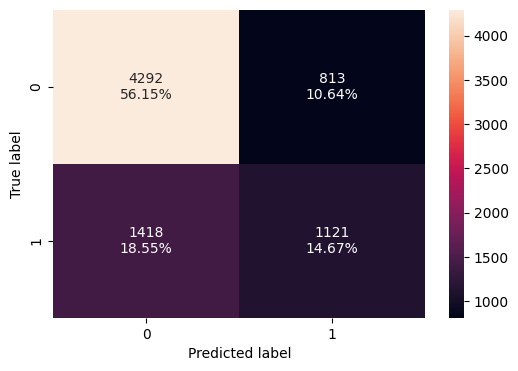

In [193]:
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Bagging Classifier

In [194]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

In [195]:
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.998879  0.999916   0.998408  0.999161


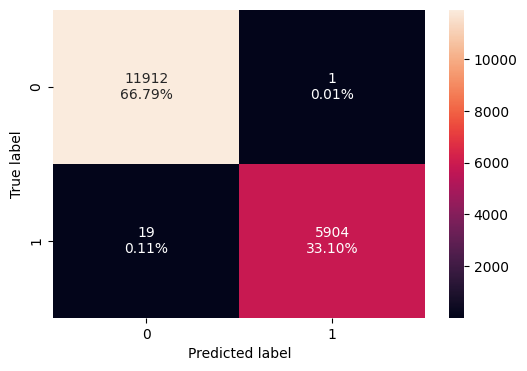

In [196]:
# create confusion matrix for train data
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train)

#### Checking model performance on test set

In [197]:
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.744767  0.884231   0.768471  0.822297


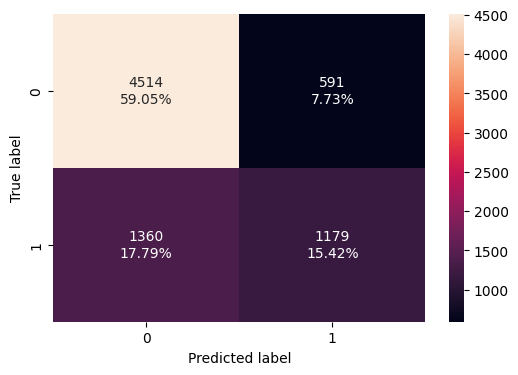

In [198]:
# create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* Model performance increased after hyperparameter tuning. F1 value increased to 81%

### Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')

# Fit the Random Forest classifier on the training data
rf_estimator.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

In [200]:
# Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


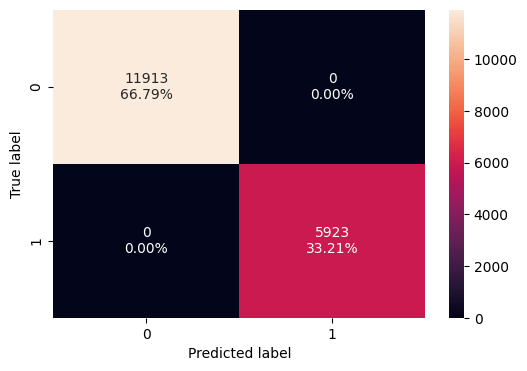

In [201]:
# create confusion matrix for train data
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

#### Checking model performance on test set

In [202]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733386  0.853281   0.771656  0.810419


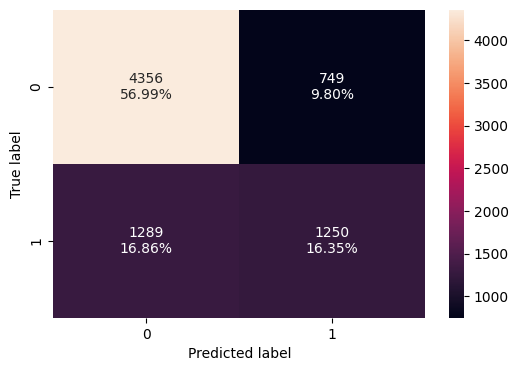

In [203]:
# create confusion matrix for test data
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* Random forest is overfitting the training data as there is significant difference between training and test scores for all the metrics.

### Hyperparameter Tuning - Random Forest

In [204]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: So

/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: So

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=7,
                       n_estimators=30, oob_score=True, random_state=1)

#### Checking model performance on training set

In [205]:
# check performance for train data on tuned estimator
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.767717  0.893142   0.787565  0.837037


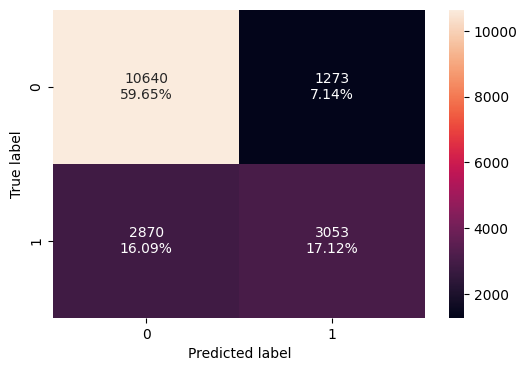

In [206]:
# create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

#### Checking model performance on test set

In [207]:
# check performance for test data on tuned estimator
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.750916  0.880313   0.776568  0.825193


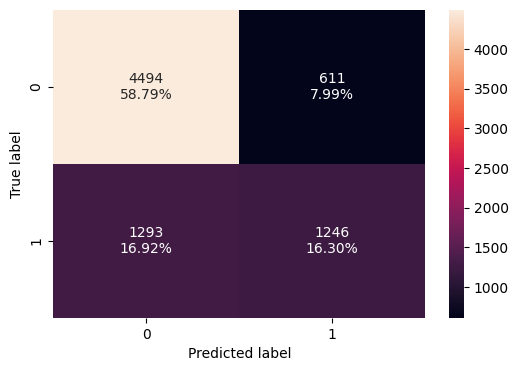

In [208]:
# create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

* There is no significant difference between train and test results.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [209]:
# define AdaBoost Classifier with random state = 1
ab_classifier = AdaBoostClassifier(random_state=1)
# fit AdaBoost Classifier on the train data
ab_classifier.fit(X_train,y_train)



AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

In [210]:
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.737665  0.887938   0.759805  0.818889


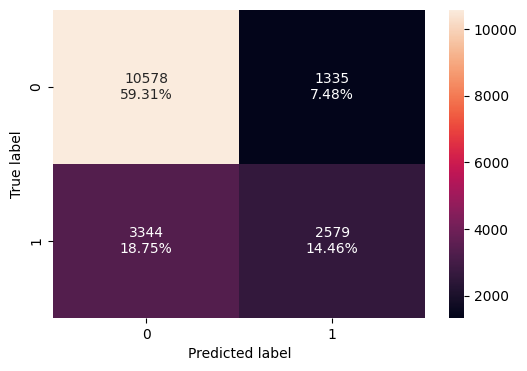

In [211]:
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

* F1 value stays the same but overfitting on train data decreased.

#### Checking model performance on test set

In [212]:
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)


   Accuracy    Recall  Precision        F1
0  0.735217  0.888345   0.757222  0.817559


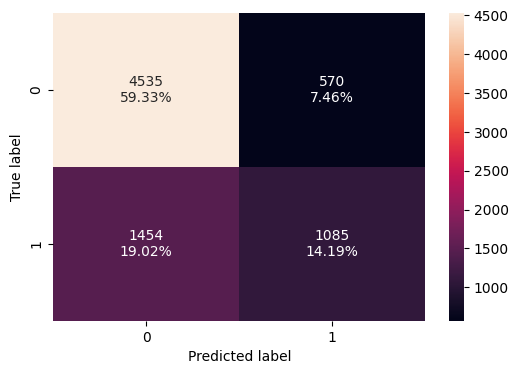

In [213]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Results are almost the same with training data

### Hyperparameter Tuning - AdaBoost Classifier

In [214]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": np.arange(0.01, 0.1, 0.05),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.01, random_state=1)

#### Checking model performance on training set

In [215]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.721294  0.920255   0.731647  0.815184


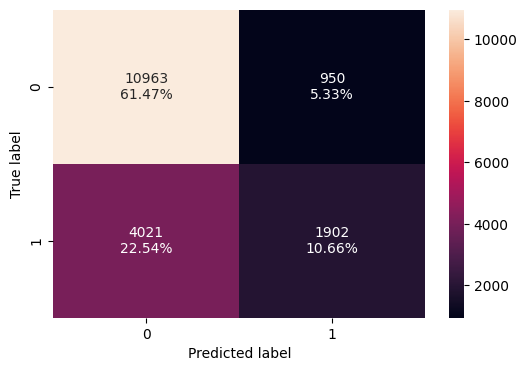

In [216]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

#### Checking model performance on test set

In [217]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.725144  0.927718    0.73222  0.818457


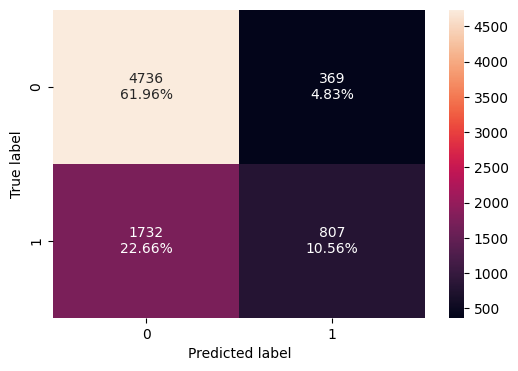

In [218]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* Values are very close for train and test data.

### Gradient Boosting Classifier

In [219]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

In [220]:
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.754934  0.876018   0.782896  0.826843


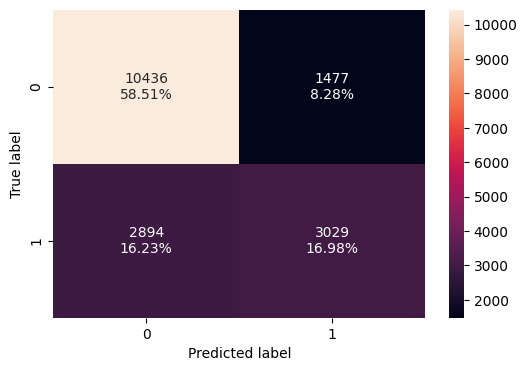

In [221]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

#### Checking model performance on test set

In [222]:
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.753271  0.874437   0.781923  0.825596


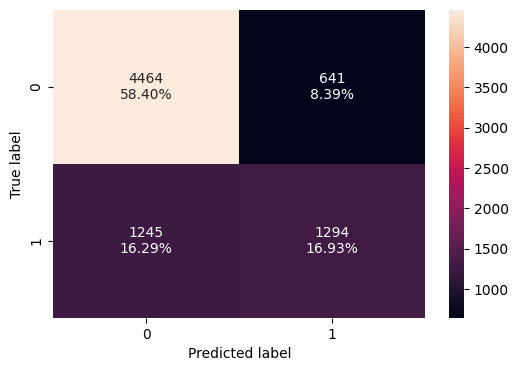

In [223]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* We received highest F1 value so far.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [224]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

#### Checking model performance on training set

In [ ]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.734806  0.912197   0.746822  0.821267


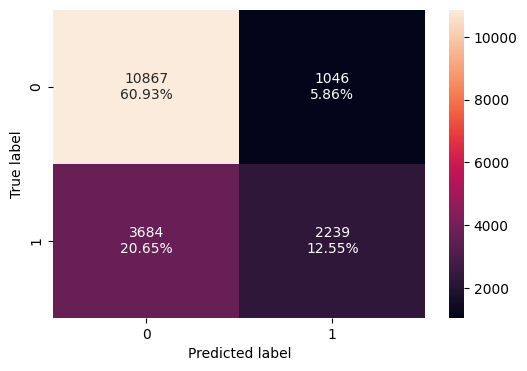

In [ ]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

#### Checking model performance on test set

In [ ]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0   0.73731  0.916357   0.747404  0.823302


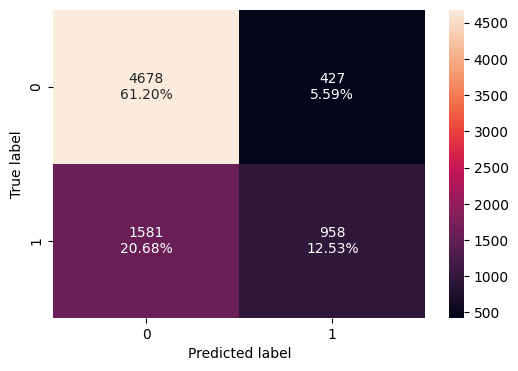

In [ ]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Bagging", bagging_estimator_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = gbc_tuned
from sklearn.ensemble import StackingClassifier

# Define the Stacking classifier
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Fit the Stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)


StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Bagging',
                                BaggingClassifier(max_features=0.5,
                                                  max_samples=0.7,
                                                  n_estimators=50,
                                                  random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=5,
                                                       min_samples_split=3,
                                                       n_estimators=10,
                                                       oob_score=True,
                                                       random_state=1))],
                   final_estimator=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                              learning_rate=0.01,
                                                              max_features=0.7,
                                                              n_estimators=50,
                                                              random_state=1,
                                                              subsample=0.7))

### Checking model performance on training set

In [ ]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.789527  0.899018   0.807631  0.850878


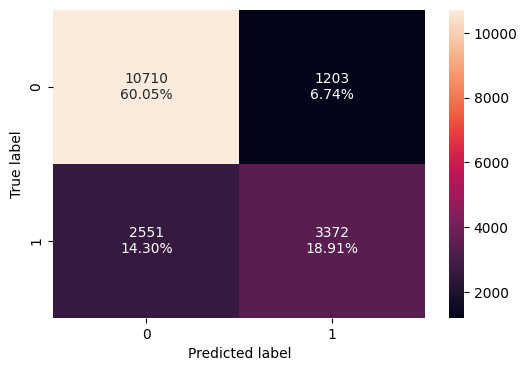

In [ ]:
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

### Checking model performance on test set

In [ ]:
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.749738  0.873457   0.778729  0.823377


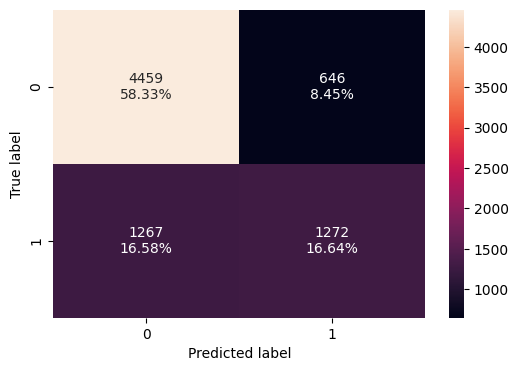

In [ ]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* This model performed well on both training and test data.

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,Stacking Classifier
Accuracy,1.0,0.709632,0.978695,0.979760,1.0,0.735703,0.737665,0.721294,0.754934,0.734806,0.789527
Recall,1.0,0.929069,0.996474,0.999077,1.0,0.912281,0.887938,0.920255,0.876018,0.912197,0.899018
Precision,1.0,0.718608,0.972316,0.971433,1.0,0.747610,0.759805,0.731647,0.782896,0.746822,0.807631
F1,1.0,0.810397,0.984247,0.985061,1.0,0.821777,0.818889,0.815184,0.826843,0.821267,0.850878


In [ ]:
# testing performance comparison


models_test_comp_df = pd.concat(

       [ decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,Stacking Classifier
Accuracy,0.667713,0.713370,0.733386,0.738619,0.708137,0.731162,0.735217,0.725144,0.753271,0.737310,0.749738
Recall,0.745544,0.937512,0.853281,0.917924,0.840744,0.909892,0.888345,0.927718,0.874437,0.916357,0.873457
Precision,0.754111,0.718834,0.771656,0.747965,0.751664,0.744391,0.757222,0.732220,0.781923,0.747404,0.778729
F1,0.749803,0.813738,0.810419,0.824274,0.793712,0.818863,0.817559,0.818457,0.825596,0.823302,0.823377


* Gradient Boost Classifier has the highest F1 score (.8255).

### Important features of the final model

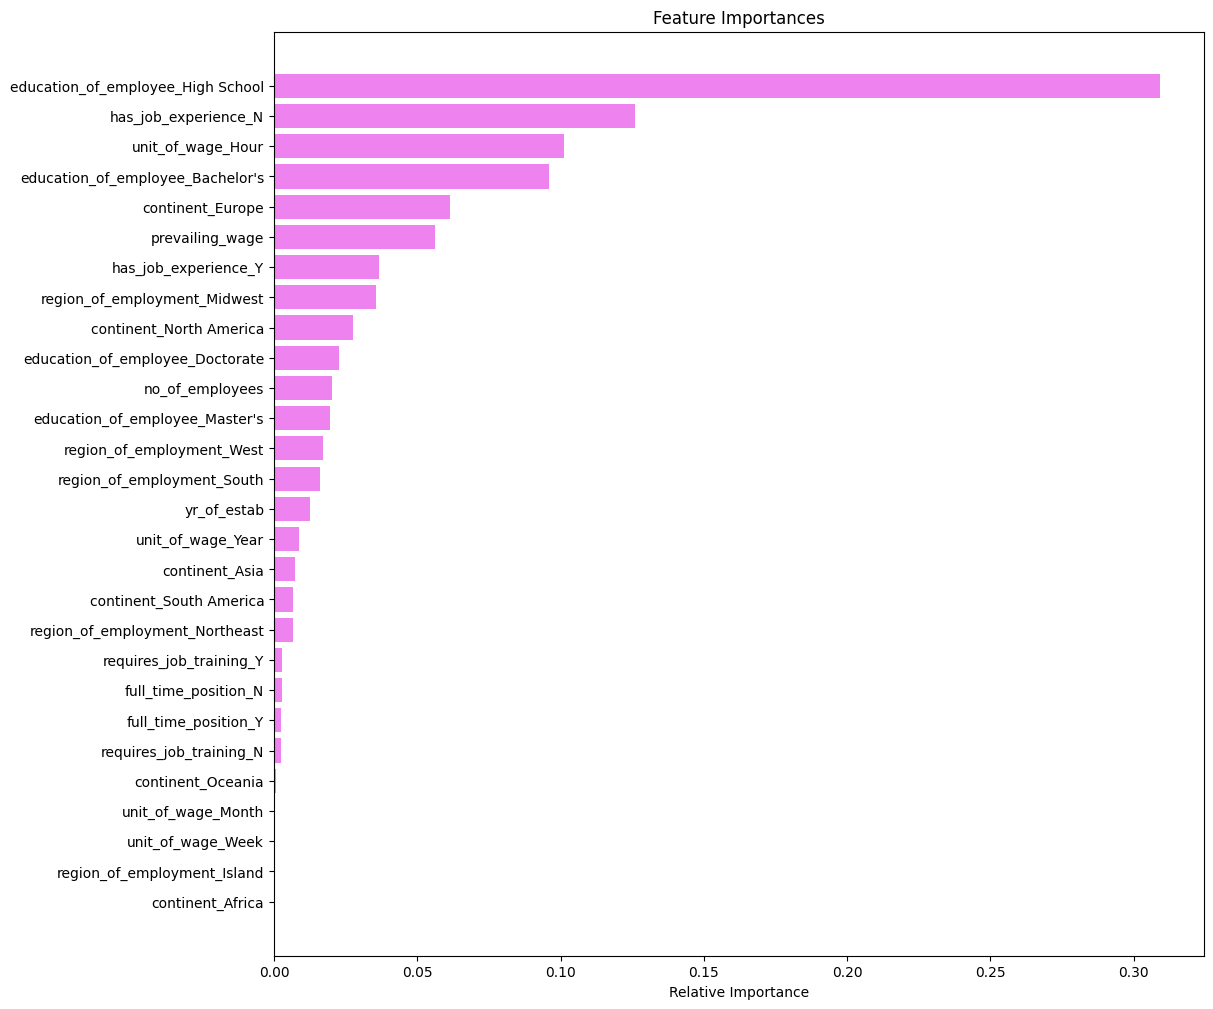

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Business Insights and Recommendations

* Based on our analysis we can say that  approval process has the following features important. :

    1-**Education of Employee - High School:** Applicants with a high school education level are influential in the prediction.

    2-**Has Job Experience - No**: Applicants with no job experience seem to impact the visa approval status.

    3-**Unit of Wage - Hour:** The unit of wage being hourly is a significant factor.

    4-**Education of Employee - Bachelors:** Applicants with a bachelor's degree are also considered in the prediction.

    5-**Continent - Europe:** The continent being Europe seems to play a role in the prediction.

    6-**Prevailing Wage:** The prevailing wage is an important factor in determining the visa approval status.

    7-**Has Job Experience - Yes:** On the other hand, applicants with job experience also contribute to the prediction.



Based on the information provided and the identified feature importances, here are some business insights and recommendations:

* **Education Level Impact**:

    **Insight:** High school education appears to be a significant factor influencing the visa approval process.

   **Recommendation:** Consider evaluating the educational qualifications of applicants, giving attention to those with high school education.

* **Job Experience Consideration:**

     **Insight:** The absence of job experience is identified as an important driver affecting visa approval.

     **Recommendation:** Assess applicants without job experience carefully, as this factor may impact the approval decision.

* **Wage Structure Matters:**

     **Insight:** The unit of wage being hourly is highlighted as influential.

     **Recommendation:** Pay attention to the wage structure, particularly for positions with hourly wages, as it appears to be a key feature in the decision-making process.

* **Educational Attainment - Bachelor's Degree:**

    **Insight:** Having a bachelor's degree is recognized as a factor affecting visa approval.

    **Recommendation:** Place emphasis on applicants with a bachelor's degree, as this educational level may positively contribute to their chances of visa approval.

* **Geographical Considerations:**

  **Insight:** The continent, specifically Europe, is identified as a relevant feature.

  **Recommendation:** Take into account the continent of origin, especially Europe, when evaluating visa applications. Consider regional variations and factors.

  **Prevailing Wage Significance:**

    **Insight:** Prevailing wage is highlighted as an important consideration.

    **Recommendation:** Pay careful attention to the prevailing wage associated with the positions applied for, ensuring it aligns with the norms in the specific occupation and region.

 **Job Experience - Yes:**

  **Insight:** Applicants with job experience also impact the visa approval process.
        
  **Recommendation:** Acknowledge the positive influence of job experience. Consider applicants with relevant work experience favorably during the evaluation process.

**General Recommendations:**

  * **Data-Driven Decision-Making:** Leverage the insights gained from machine learning models to inform decision-making in the visa approval process.
  * **Continuous Monitoring:** Regularly update and monitor the model's performance to adapt to changes in application patterns and regulations.
  * **Transparency and Fairness:** Ensure transparency in the decision-making process and maintain fairness in evaluating applications, avoiding bias based on individual features.
  * **Communication with Applicants:** Clearly communicate the criteria for visa approval to applicants, providing guidance on areas that can strengthen their applications.

By incorporating these insights and recommendations, EasyVisa can enhance the efficiency and effectiveness of the visa approval process, providing a more informed and data-driven approach to decision-making.

___